In [50]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Files to Load
city_data_to_load = os.path.join("data", "city_data.csv")
ride_data_to_load = os.path.join("data", "ride_data.csv")

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride = pd.merge(ride_df, city_df, how = "inner", on = "city")
# Display the data table for preview
city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

C:\Users\Landrover\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


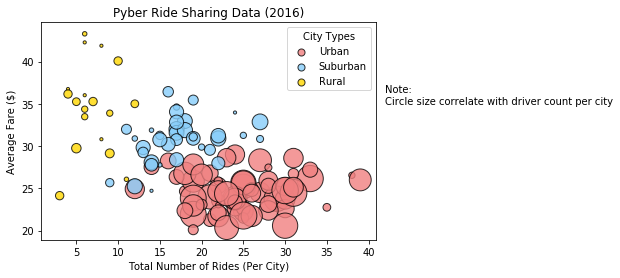

In [51]:
# Obtain the x and y coordinates for each of the three city types
city_tpe_grp = city_ride.groupby("type")
aggregation = {"fare":{"Average Fare": "mean"},
               "ride_id":{"Total Number of Rides": "count"},
               "driver_count":{"Driver Count": "mean"}}
city_type_df = {}
for group, frame in city_tpe_grp:
    city_group = frame.groupby("city")
    city_type_df[group] = city_group.agg(aggregation)
    city_type_df[group].columns = city_type_df[group].columns.droplevel(0)
    
# Build the scatter plots for each city type
c_type = ["Urban", "Suburban", "Rural"]
colors = ["lightcoral", "lightskyblue", "gold"]
i = 0
for key in c_type:
    plt.scatter(city_type_df[key]["Total Number of Rides"], city_type_df[key]["Average Fare"],
                marker = "o",edgecolors = "k", s = 10*city_type_df[key]["Driver Count"],
                alpha = 0.8, color = colors[i], label = key)
    i+=1

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
lgnd = plt.legend(title = "City Types")
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]
# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlate with driver count per city")

# Save Figure
output_dir = os.path.join("Images", "PyRide Sharing.png")
if not os.path.exists("Images"):
    os.mkdir("Images")
    
plt.savefig(output_dir, bbox_inches='tight')

plt.show()

## Total Fares by City Type

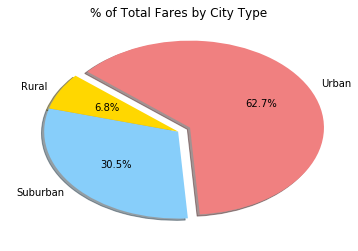

In [52]:
# Calculate Type Percents
cty_tpe_fare = city_tpe_grp[["fare"]].sum().rename(columns = {"fare":"Total Fare"})
cty_tpe_fare = cty_tpe_fare.sort_values("Total Fare",ascending = False)
# Build Pie Chart
explode = (0.1,0,0)
plt.pie(cty_tpe_fare["Total Fare"], explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,
        counterclock = False, labels = cty_tpe_fare.index)
plt.title("% of Total Fares by City Type")
# Save Figure
output_file = os.path.join("Images", "Total fares.png")   
plt.savefig(output_file)

plt.show()

## Total Rides by City Type

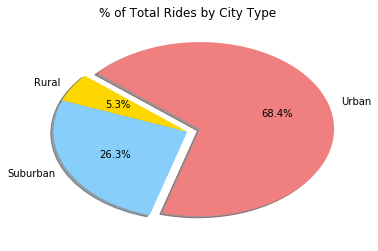

In [53]:
# Calculate Ride Percents
cty_tpe_ride = city_tpe_grp[["ride_id"]].count().rename(columns = {"ride_id":"Total Rides"})
cty_tpe_ride = cty_tpe_ride.sort_values("Total Rides",ascending = False)
# Build Pie Chart
plt.pie(cty_tpe_ride["Total Rides"], explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,
        counterclock = False, labels = cty_tpe_fare.index)
plt.title("% of Total Rides by City Type")
# Save Figure
output_file = os.path.join("Images", "Total Rides.png")   
plt.savefig(output_file)

plt.show()


## Total Drivers by City Type

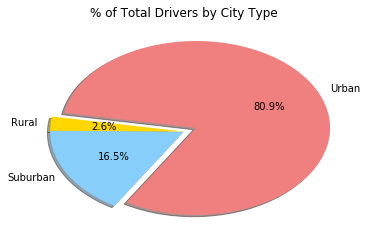

In [54]:
# Calculate Driver Percents
city_grps = city_ride.groupby("city")
aggregation_cty = {"driver_count":"mean",
               "type":lambda x:x.unique()[0]}
city_grp_df = city_grps.agg(aggregation_cty)

cty_tpe_driver = city_grp_df.groupby("type")[["driver_count"]].sum().rename(columns = {"driver_count":"Total Drivers"})
cty_tpe_driver = cty_tpe_driver.sort_values("Total Drivers",ascending = False)

# Build Pie Chart
plt.pie(cty_tpe_driver["Total Drivers"], explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=170,
        counterclock = False, labels = cty_tpe_fare.index)
plt.title("% of Total Drivers by City Type")

# Save Figure
output_file = os.path.join("Images", "Total Drivers.png")   
plt.savefig(output_file)

plt.show()
